<a href="https://colab.research.google.com/github/saraycubillos/ClusterSpotifySongs/blob/main/VFinal_Spotify_songs_2023_revMBSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Most Streamed Spotify Songs 2023
# Students:
# - Israel Vélez González
# - Saray Cubillos García

# 1) Load libraries and data


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from scipy.special import entr # Entropía de Shannon
from scipy.stats import iqr # Interquartile range
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import cross_val_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale

In [ ]:
#from google.colab import drive
#drive.mount('spotify-2023.csv')

# Importamos los datos de csv en un dataframe de pandas
spotify_data = pd.read_csv("/content/spotify-2023.csv", sep = ",",encoding='latin-1')
# Columnas del dataframe
spotify_data


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# 2) Understanding the data
-Check value types
-Check NaN values

In [ ]:
del(spotify_data["artist_count"])
del(spotify_data["released_month"])
del(spotify_data["released_day"])
del(spotify_data["key"])
del(spotify_data["mode"])
spotify_data

,track_name,artist(s)_name,released_year,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023,553,147,141381703,43,263,45,10,826,125,80,89,83,31,0,8,4
1,LALA,Myke Towers,2023,1474,48,133716286,48,126,58,14,382,92,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,2023,1397,113,140003974,94,207,91,14,949,138,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,2019,7858,100,800840817,116,207,125,12,548,170,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,2023,3133,50,303236322,84,133,87,15,425,144,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,2022,953,0,91473363,61,13,37,1,0,144,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,2022,1180,0,121871870,4,0,8,0,0,166,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2022,573,0,73513683,2,0,7,0,0,92,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",2022,1320,0,133895612,29,26,17,0,0,97,82,67,77,8,0,12,5


In [ ]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   released_year         953 non-null    int64 
 3   in_spotify_playlists  953 non-null    int64 
 4   in_spotify_charts     953 non-null    int64 
 5   streams               953 non-null    object
 6   in_apple_playlists    953 non-null    int64 
 7   in_apple_charts       953 non-null    int64 
 8   in_deezer_playlists   953 non-null    object
 9   in_deezer_charts      953 non-null    int64 
 10  in_shazam_charts      903 non-null    object
 11  bpm                   953 non-null    int64 
 12  danceability_%        953 non-null    int64 
 13  valence_%             953 non-null    int64 
 14  energy_%              953 non-null    int64 
 15  acousticness_%        953 non-null    in

In [ ]:
spotify_data.describe().T

,count,mean,std,min,25%,50%,75%,max
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0
danceability_%,953.0,66.969570,14.630610,23.0,57.0,69.0,78.0,96.0
valence_%,953.0,51.431270,23.480632,4.0,32.0,51.0,70.0,97.0
energy_%,953.0,64.279119,16.550526,9.0,53.0,66.0,77.0,97.0


In [ ]:
missing_values = spotify_data.isna().sum()
missing_values[missing_values > 0]

in_shazam_charts    50
dtype: int64

#3) Analize numerical variables

In [ ]:
a = spotify_data._get_numeric_data().isna().sum()
a[a!=0]

Series([], dtype: int64)

VIF inicial de las variables numéricas.
Un valor alto indica una alta correlación entre las variables y será necesario eliminar algunas de estas

Referencia: https://towardsdatascience.com/how-to-remove-multicollinearity-using-python-4da8d9d8abb2

In [ ]:
X = spotify_data[list(spotify_data.select_dtypes(include='int').columns[:-1])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,91.001373,released_year
7,30.462708,danceability_%
9,29.188384,energy_%
6,21.010789,bpm
8,8.452538,valence_%
3,4.200768,in_apple_playlists
10,3.431920,acousticness_%
4,3.410108,in_apple_charts
1,3.083040,in_spotify_playlists
12,2.867752,liveness_%


Observamos que la variable "released_year" tiene un VIF muy alto y es entendible porque esta data de canciones más escuchadas en su mayoría son del mismo año, 2023 por lo cual se elimina.

In [ ]:
del(spotify_data["released_year"])

In [ ]:
def numerical_organice(data):
  data["in_shazam_charts"] = data["in_shazam_charts"].fillna(0)       #Replace nan values with zero

numerical_organice(spotify_data)

Reemplazamos los 50 valores nulos de "in_shazam_charts" ya que son los números de reproducciones que no se encontraron en esa aplicación


<ipython-input-13-9e2ef5f5112b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = spotify_data.corr()


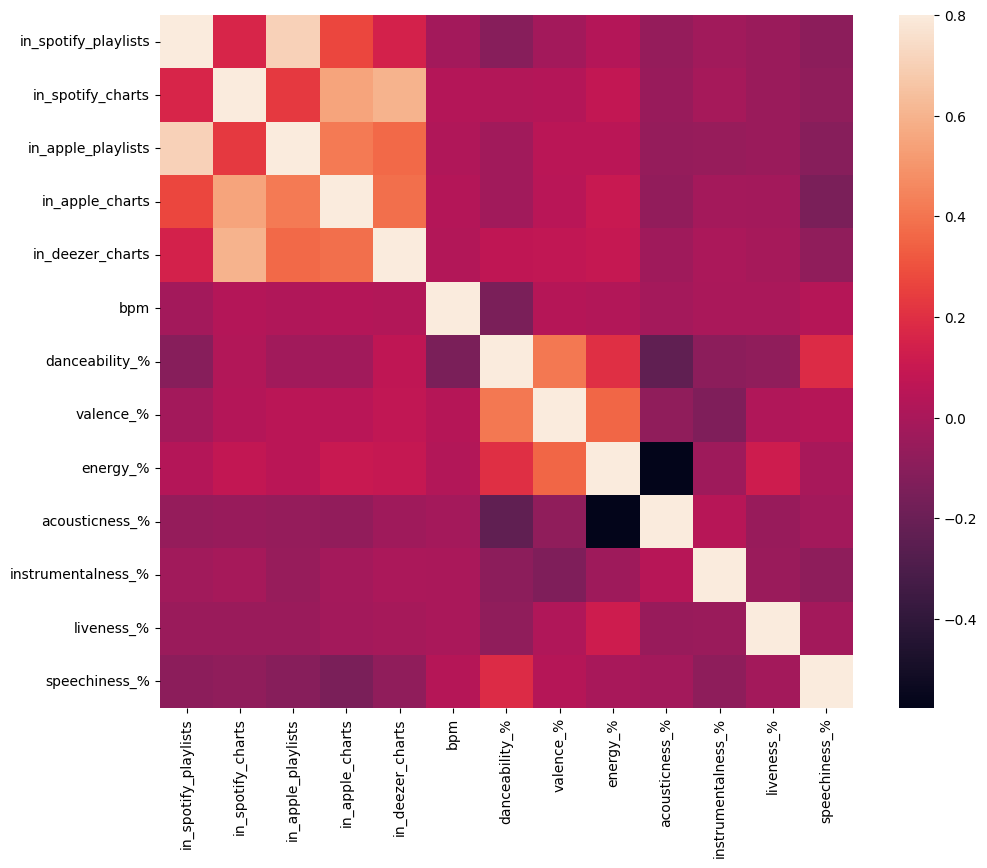

In [ ]:
corrmat = spotify_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

VIFs luego de eliminar las variables que tenían los valores más altos

In [ ]:
X = spotify_data[list(spotify_data.select_dtypes(include='int').columns[:-1])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
8,20.121338,energy_%
6,17.494323,danceability_%
5,14.248055,bpm
7,7.897958,valence_%
2,4.200753,in_apple_playlists
3,3.390606,in_apple_charts
0,3.050179,in_spotify_playlists
11,2.792176,liveness_%
1,2.775596,in_spotify_charts
9,2.342839,acousticness_%


## Analize atipic data values

In [ ]:
numerical_data = X._get_numeric_data()
numerical_data.isna().sum()

in_spotify_playlists    0
in_spotify_charts       0
in_apple_playlists      0
in_apple_charts         0
in_deezer_charts        0
bpm                     0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
dtype: int64

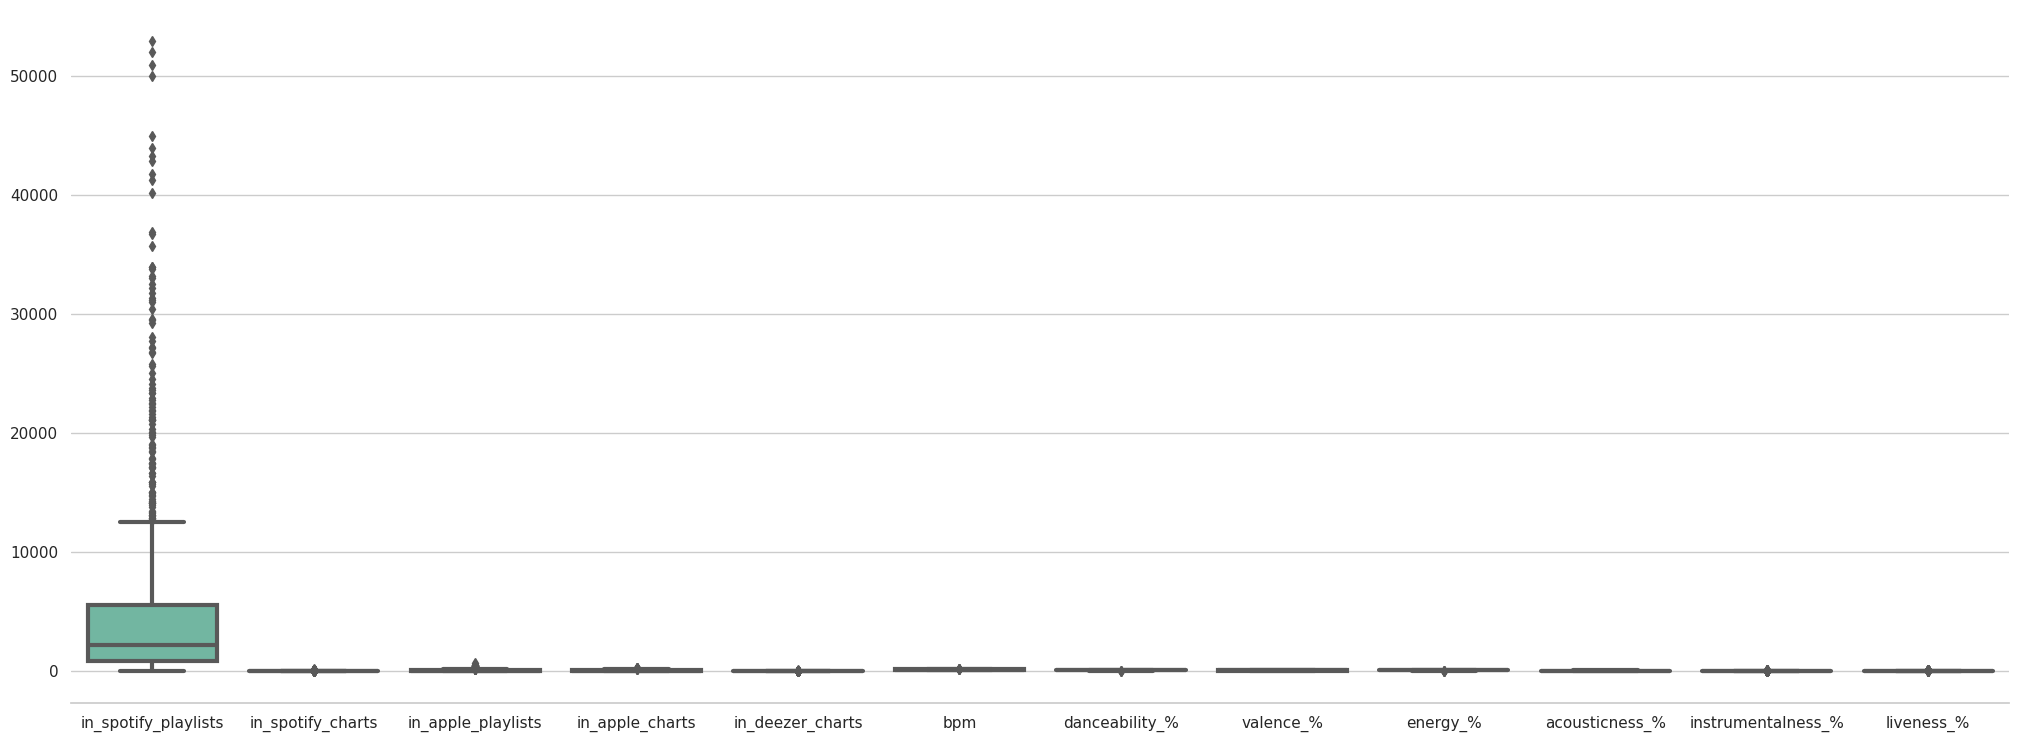

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = numerical_data, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

## **Normalización**

In [ ]:
MinMax = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1
nombres = numerical_data.columns
df_reset = numerical_data.reset_index(drop=True)
Datos_Min_Max = MinMax.fit_transform(df_reset) # Transformación de los nuevos datos con una escala MinMax
Datos_Min_Max = pd.DataFrame(Datos_Min_Max, columns = nombres)

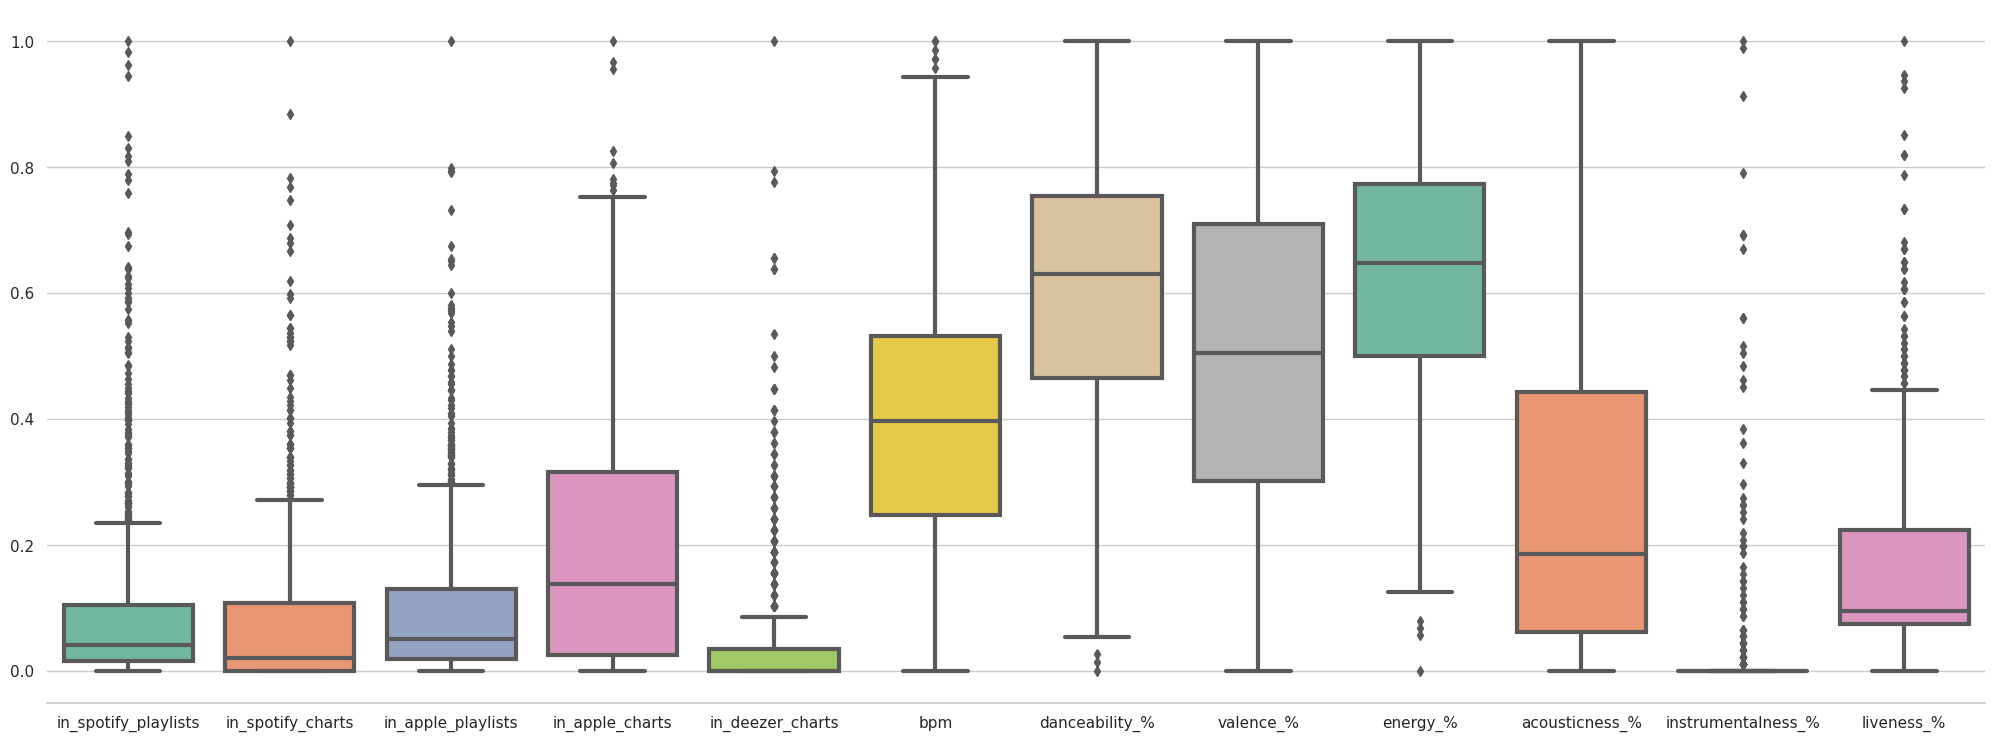

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = Datos_Min_Max, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

In [ ]:
X.shape

(953, 12)

### Local outlier factor (LOF)

In [ ]:
LOF = LocalOutlierFactor(n_neighbors = 5, algorithm = 'auto', contamination = 'auto', metric = 'euclidean')
# OJO, usar un número de vecinos más cercano con números impares.

Filtrado = LOF.fit_predict(Datos_Min_Max) # Se realiza la predicción de los datos atípicos

NOF = LOF.negative_outlier_factor_ # Detecta los valores positivos y negativos (residuos). Si los valores son grandes, entonces son valores no atípicos y por lo general, son valores cercanos a -1.
                                   # Si los valores son positivos y grandes y cercanos a 1, entonces son valores atípicos. La opción negative_outlier_dactor_ calcula dichos valores por
                                   # la media de la relación entre la densidad local de una muestra y las de sus vecinos más cercanos.

radio_outiler = (NOF.max() - NOF)/(NOF.max() - NOF.min()) # radio de detección de datos atípicos
ground_truth = np.ones(len(Datos_Min_Max), dtype = int)
# Se recomienda para luego comparar que datos es o no atípico (genera un vector de 1 o -1)
n_errors = (Filtrado != ground_truth).sum() # número de datos atípicos

In [ ]:
print("Detección: ", Filtrado)
print("Factores atípicos negativos: ", NOF)
print("Número de muestras o filas con datos atípicos: ", n_errors)

Detección:  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1

In [ ]:
pos = np.where(Filtrado == ground_truth) # Se identifican en que muestras o filas de nuestra base de datos hay presencia de datos atípicos
pos = np.asarray(pos)
pos = np.hstack(pos)
data_LOF = Datos_Min_Max.loc[pos, :]
print("Número de muestras sin outilers:", data_LOF.shape[0])
display(data_LOF)

Número de muestras sin outilers: 935


,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%
0,0.009874,1.000000,0.063988,0.956364,0.172414,0.425532,0.780822,0.913978,0.840909,0.319588,0.000000,0.053191
1,0.027295,0.326531,0.071429,0.458182,0.241379,0.191489,0.657534,0.612903,0.738636,0.072165,0.000000,0.074468
2,0.025838,0.768707,0.139881,0.752727,0.241379,0.517730,0.383562,0.301075,0.500000,0.175258,0.000000,0.297872
3,0.148051,0.680272,0.172619,0.752727,0.206897,0.744681,0.438356,0.580645,0.715909,0.113402,0.000000,0.085106
4,0.058676,0.340136,0.125000,0.483636,0.258621,0.560284,0.575342,0.204301,0.806818,0.144330,0.692308,0.085106
...,...,...,...,...,...,...,...,...,...,...,...,...
948,0.017440,0.000000,0.090774,0.047273,0.017241,0.560284,0.506849,0.215054,0.340909,0.587629,0.000000,0.053191
949,0.021734,0.000000,0.005952,0.000000,0.000000,0.716312,0.260274,0.032258,0.170455,0.855670,0.010989,0.095745
950,0.010252,0.000000,0.002976,0.000000,0.000000,0.191489,0.780822,0.827957,0.659091,0.041237,0.000000,0.053191
951,0.024382,0.000000,0.043155,0.094545,0.000000,0.226950,0.808219,0.677419,0.772727,0.082474,0.000000,0.095745


Al final decidimos no eliminar los datos atípicos porque solo representan el 1,68% de la data total y que no afectan las variables que vamos a clusterizar

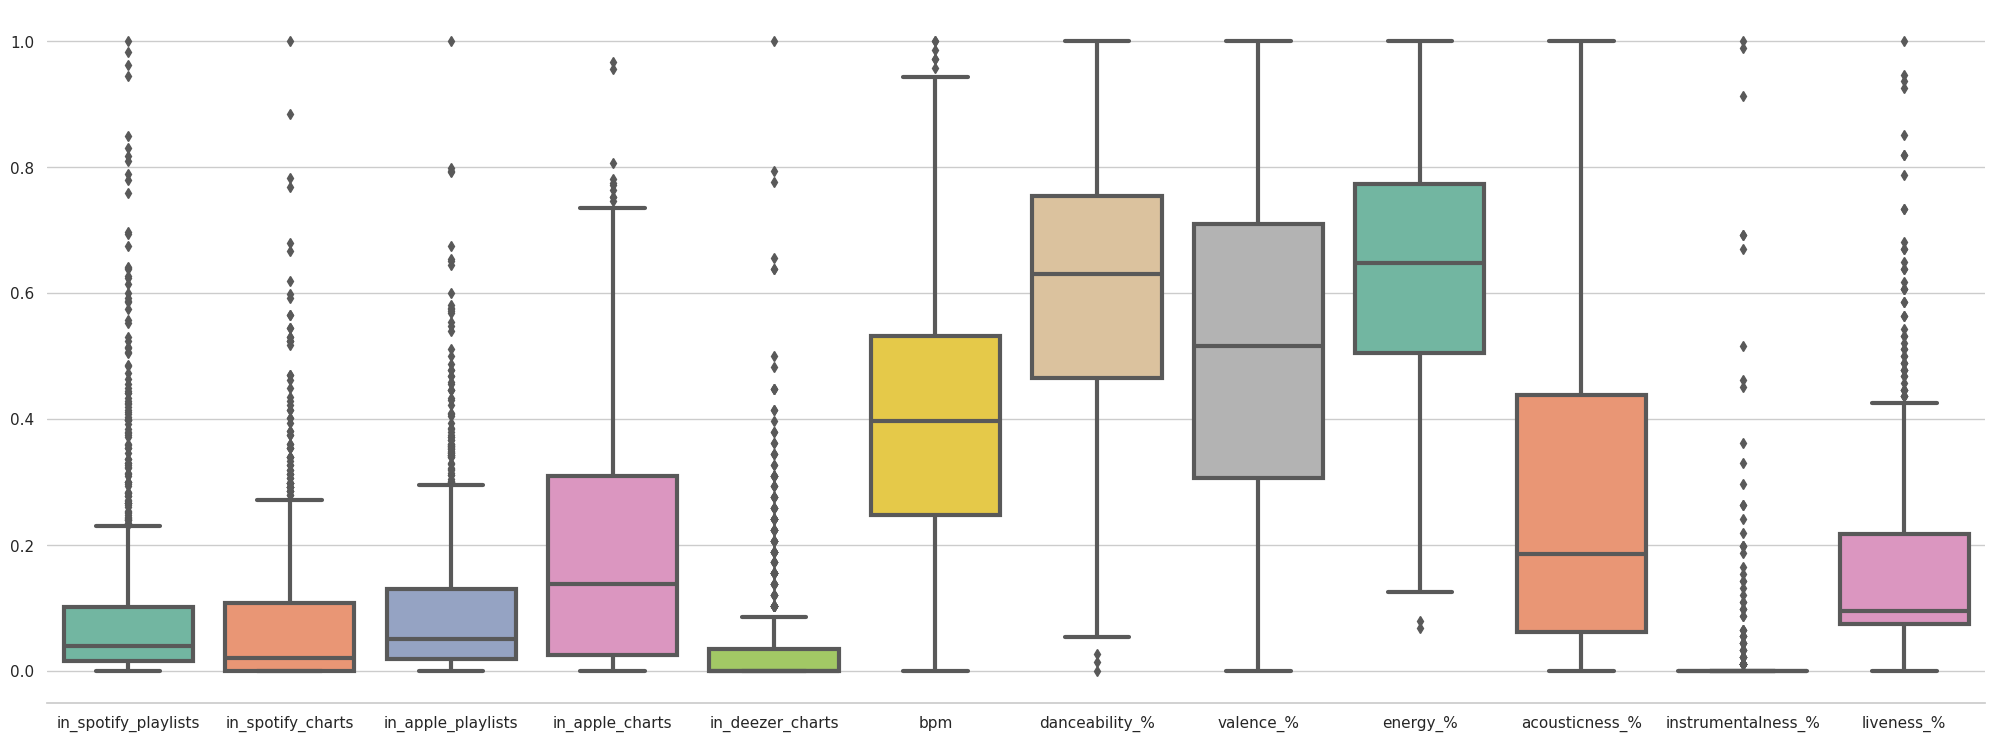

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data_LOF, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

In [ ]:
H_1 = entr(Datos_Min_Max)
H_2 = entr(data_LOF)

entropia_normalizada_1 = H_1.sum()/Datos_Min_Max.shape[0]
entropia_normalizada_2 = H_2.sum()/data_LOF.shape[0]
diferencia_entropias = abs(entropia_normalizada_1 - entropia_normalizada_2)

entropia_normalizada_1 = pd.DataFrame(entropia_normalizada_1, index = None, columns = ['Entropia Original'])
entropia_normalizada_2 = pd.DataFrame(entropia_normalizada_2, index = None, columns = ['Entropia LOF'])
diferencia_entropias = pd.DataFrame(diferencia_entropias, index = None, columns = ['Cambio de entropias'])
Comparacion_entropias = pd.concat([entropia_normalizada_1, entropia_normalizada_2, diferencia_entropias], axis = 1)

display(Comparacion_entropias)

,Entropia Original,Entropia LOF,Cambio de entropias
in_spotify_playlists,0.153960,0.152802,0.001158
in_spotify_charts,0.122645,0.121595,0.001051
in_apple_playlists,0.170280,0.170102,0.000179
in_apple_charts,0.221262,0.221296,0.000034
in_deezer_charts,0.074771,0.073403,0.001368
bpm,0.315474,0.316116,0.000642
danceability_%,0.267653,0.267597,0.000056
valence_%,0.273212,0.273564,0.000351
energy_%,0.260814,0.261282,0.000468
acousticness_%,0.227699,0.228867,0.001168


#Separar data

In [ ]:
from sklearn.model_selection import train_test_split
# Lista de las columnas que formarán Y
columnas_para_Y = ['energy_%', 'danceability_%']

# Selecciona todas las columnas excepto las indicadas en 'columnas_a_excluir'
X= Datos_Min_Max.drop(columnas_para_Y, axis=1)

# Selecciona solo las columnas indicadas en 'columnas_para_Y' para Y
y = spotify_data[columnas_para_Y]
y = y.values.reshape(-1, len(columnas_para_Y))
# Dividir los datos en conjunto de entrenamiento y prueba

#X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.2,train_size=0.8, random_state=42)

# Canciones más escuchadas


In [ ]:
# Converting the 'streams' column to numerical format
spotify_data['streams']=pd.to_numeric(spotify_data['streams'].convert_dtypes(), errors='coerce').convert_dtypes()
# Identifying the top 10 most streamed songs
top_10_songs = spotify_data.nlargest(10, 'streams')[['track_name', 'artist(s)_name', 'streams']]
print(top_10_songs)

                                        track_name  \
55                                 Blinding Lights   
179                                   Shape of You   
86                               Someone You Loved   
620                                   Dance Monkey   
41   Sunflower - Spider-Man: Into the Spider-Verse   
162                                      One Dance   
84                       STAY (with Justin Bieber)   
140                                       Believer   
725                                         Closer   
48                                         Starboy   

                   artist(s)_name     streams  
55                     The Weeknd  3703895074  
179                    Ed Sheeran  3562543890  
86                  Lewis Capaldi  2887241814  
620                   Tones and I  2864791672  
41          Post Malone, Swae Lee  2808096550  
162           Drake, WizKid, Kyla  2713922350  
84   Justin Bieber, The Kid Laroi  2665343922  
140               Ima

#Artistas más escuchados


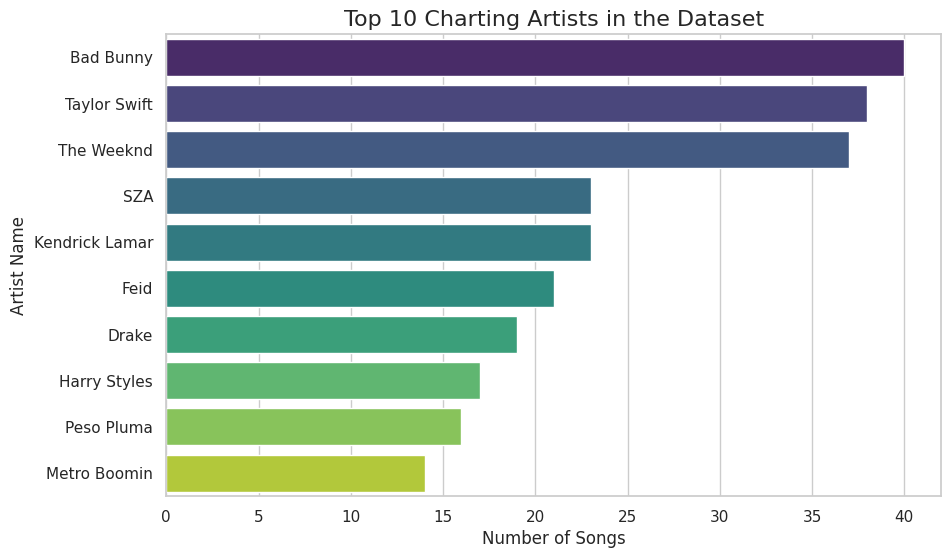

In [ ]:
# Calculate the frequency of each artist in the dataset
# Split songs by multiple artists and count each artist separately.
artist_count = spotify_data['artist(s)_name'].str.split(', ').explode().value_counts()

# Visualize the artists who are most frequently
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(y=artist_count.index[:10], x=artist_count.values[:10], palette="viridis", orient="h")


plt.title('Top 10 Charting Artists in the Dataset', fontsize=16)
plt.xlabel('Number of Songs', fontsize=12)
plt.ylabel('Artist Name', fontsize=12)

plt.show()

#Features VS. Impact on song popularity

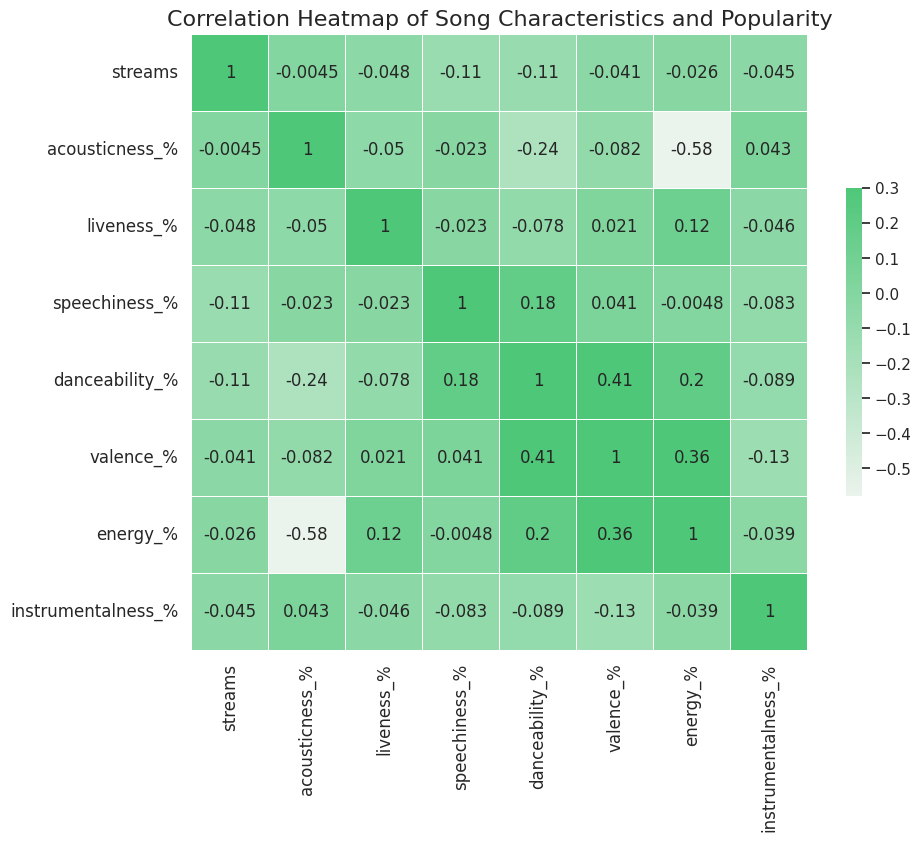

In [ ]:
# The stream data of "Love Grows" is corrupt
# Convert columns to numeric type, coercing errors to NaN
spotify_data['bpm'] = pd.to_numeric(spotify_data['bpm'], errors='coerce')
spotify_data['danceability_%'] = pd.to_numeric(spotify_data['danceability_%'], errors='coerce')
spotify_data['valence_%'] = pd.to_numeric(spotify_data['valence_%'], errors='coerce')
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

# Correlation matrix
corr_matrix = spotify_data[['streams','acousticness_%', 'liveness_%', 'speechiness_%', 'danceability_%', 'valence_%', 'energy_%',	'instrumentalness_%']].corr()

# Create a custom color palette with potify green
cmap_spotify = sns.light_palette("#1DB954", as_cmap=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, cmap=cmap_spotify, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Titles and labels
plt.title('Correlation Heatmap of Song Characteristics and Popularity', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

#Analysis of features in Relation to Popularity on Spotify

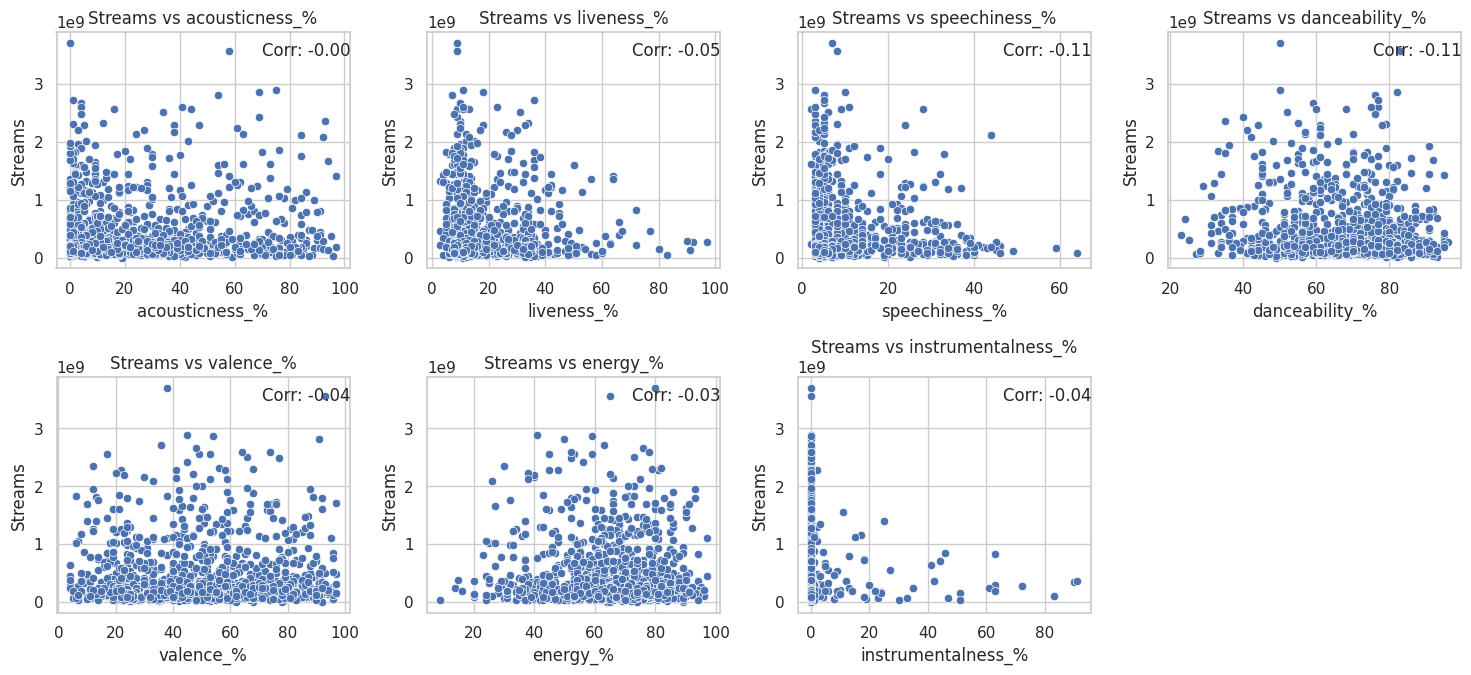

In [ ]:
# Calculate the correlation
correlation_columns = ['acousticness_%', 'liveness_%', 'speechiness_%', 'danceability_%', 'valence_%', 'energy_%',	'instrumentalness_%']
correlations = spotify_data[['streams'] + correlation_columns].corr().loc['streams', correlation_columns]

# Set the Visualization
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
features = ['acousticness_%', 'liveness_%', 'speechiness_%', 'danceability_%', 'valence_%', 'energy_%',	'instrumentalness_%']

# Create subplots for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(x=spotify_data[feature], y=spotify_data['streams'])
    plt.title(f'Streams vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Streams')
    # Displaying the correlation on the plot
    plt.annotate(f"Corr: {correlations[feature]:.2f}",
                 xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.show()

#5) Models test


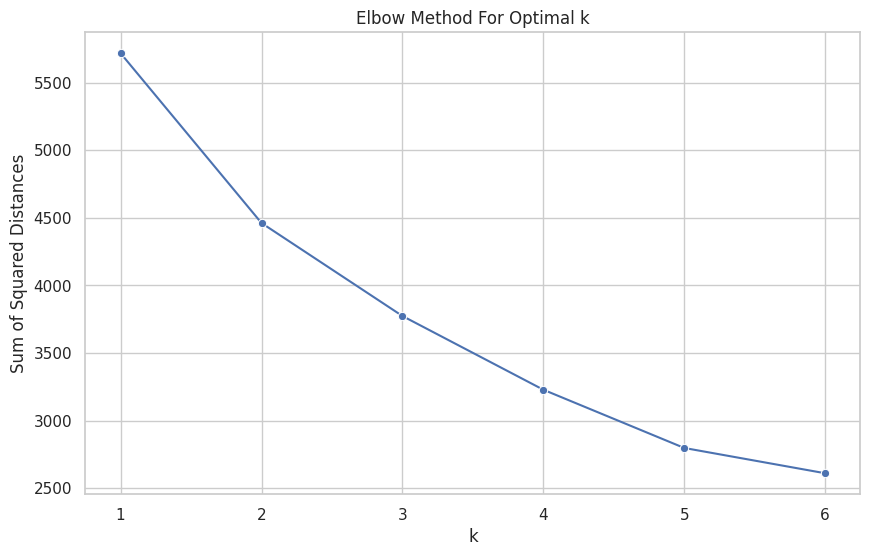

In [ ]:
# Features to use for clustering
features = ['acousticness_%', 'liveness_%', 'speechiness_%', 'danceability_%', 'valence_%', 'energy_%']

# Scaling the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(spotify_data[features])

sse = []
possible_k_values = range(1, 7)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
sns.lineplot(x=possible_k_values, y=sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


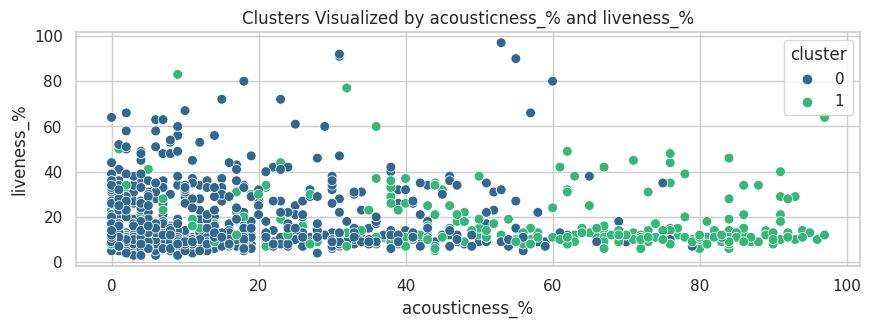

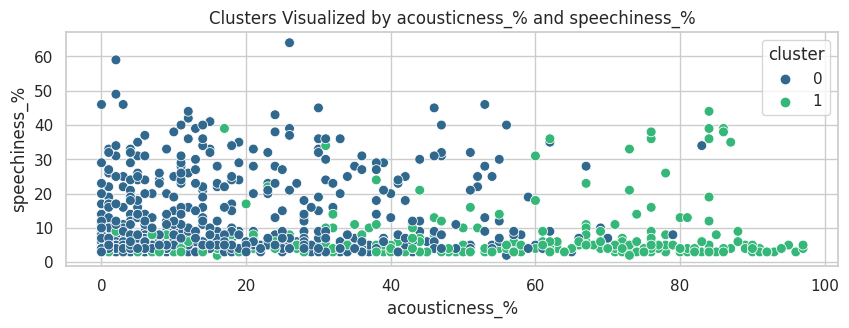

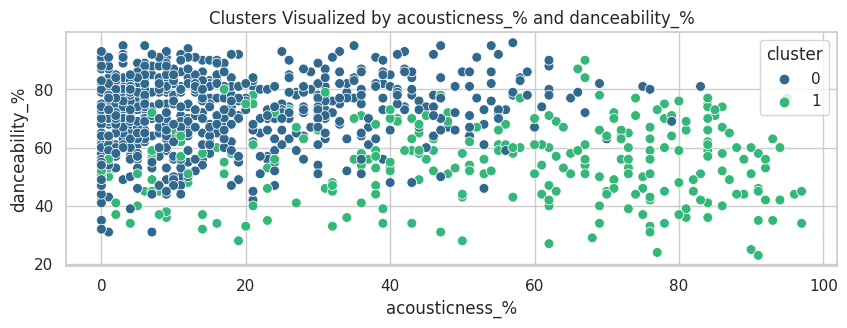

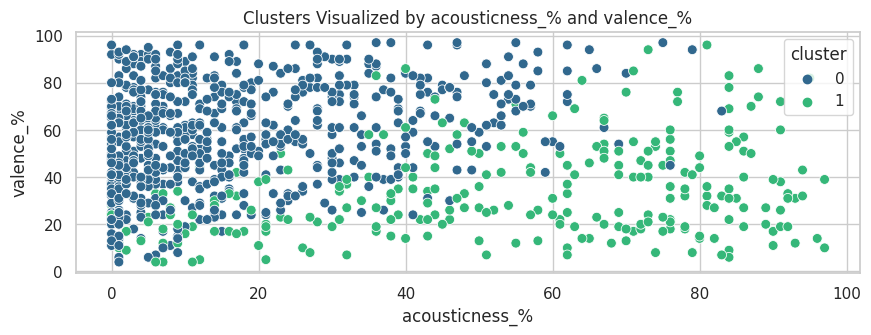

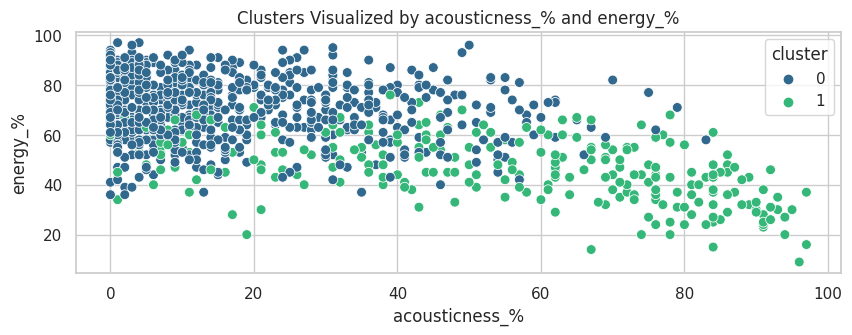

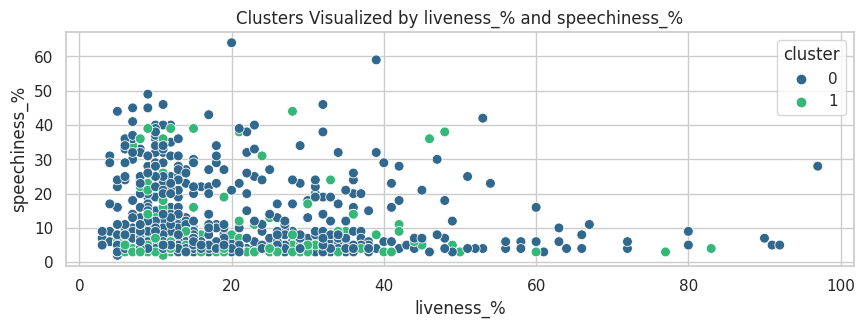

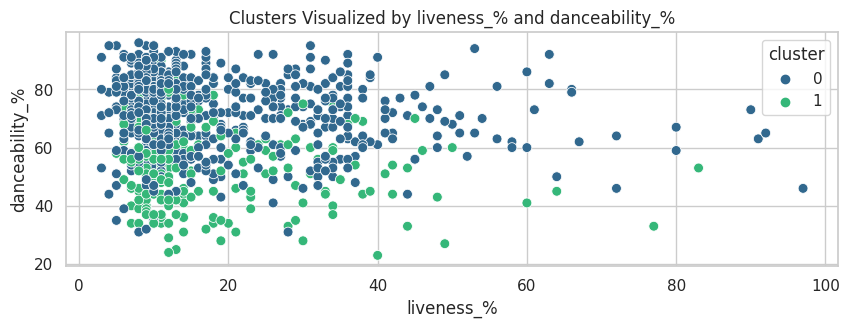

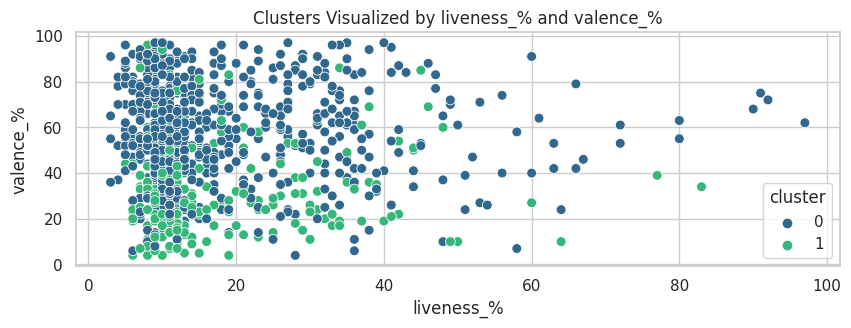

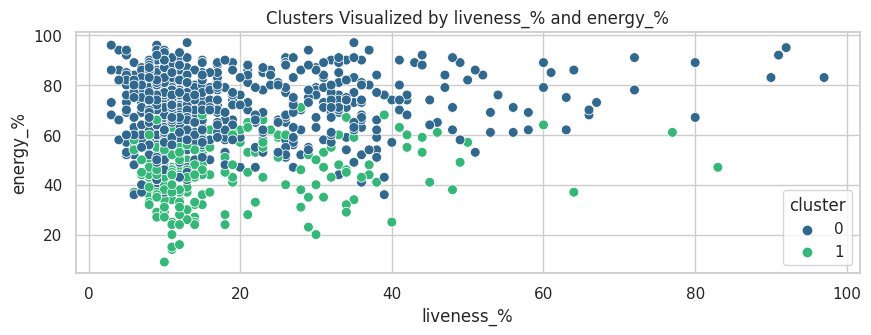

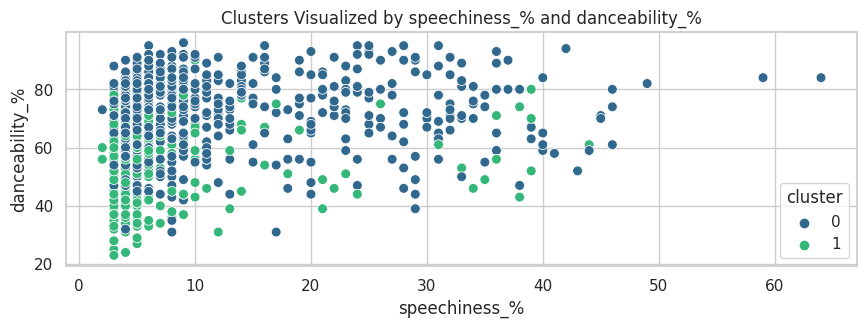

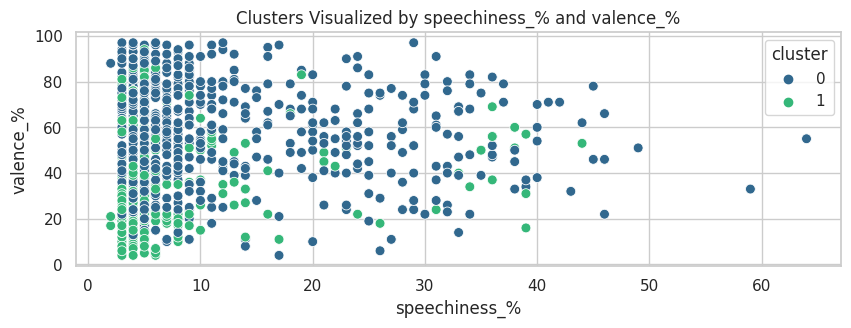

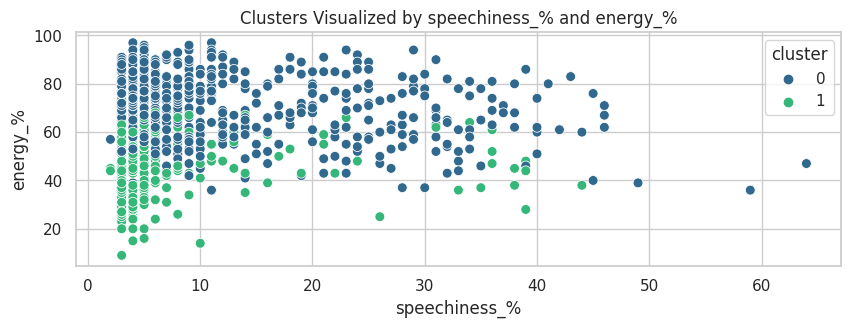

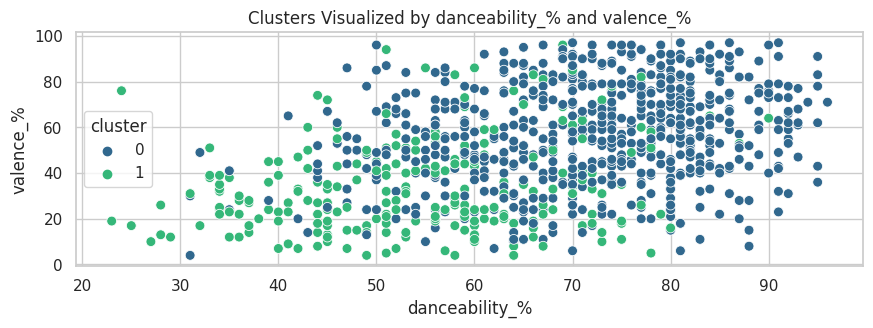

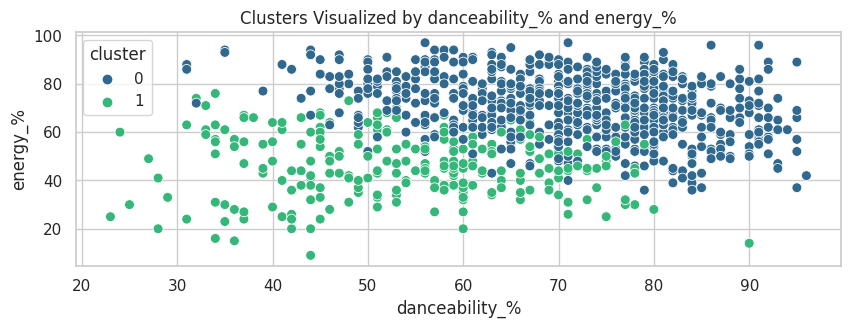

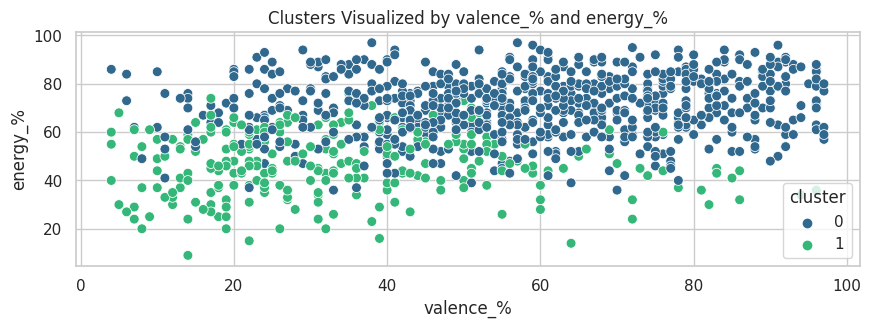

         danceability_%   energy_%
cluster                           
0             71.595960  70.886003
1             54.638462  46.669231


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
features = ['acousticness_%', 'liveness_%', 'speechiness_%', 'danceability_%', 'valence_%', 'energy_%']
featuresy = ['danceability_%','energy_%']

# Número de clusters
num_clusters = 2

# Apply PCA and fit the features
pca = PCA(n_components=2)
components = pca.fit_transform(data_scaled)


# Realiza la agrupación en clusters utilizando K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
spotify_data['cluster_from_PCA'] = kmeans.fit_predict(components)
spotify_data['cluster']=kmeans.fit_predict(data_scaled)

# Calcula el número de filas y columnas necesarias para mostrar todos los gráficos
n = len(features)
num_rows = n // 2
num_cols = n // 2 if n % 2 == 0 else n // 2 + 1

# Genera todos los gráficos de dispersión para pares de características
for i in range(n):
    for j in range(i + 1, n):
        plt.subplot(num_rows, num_cols, j - i)
        sns.scatterplot(x=spotify_data[features[i]], y=spotify_data[features[j]], hue=spotify_data['cluster'], palette='viridis', s=50)
        plt.title(f'Clusters Visualized by {features[i]} and {features[j]}')
        plt.tight_layout()
        plt.show()

# Analyzing the clusters
cluster_summary = spotify_data.groupby('cluster')[featuresy].mean()
print(cluster_summary)

Validación del modelo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


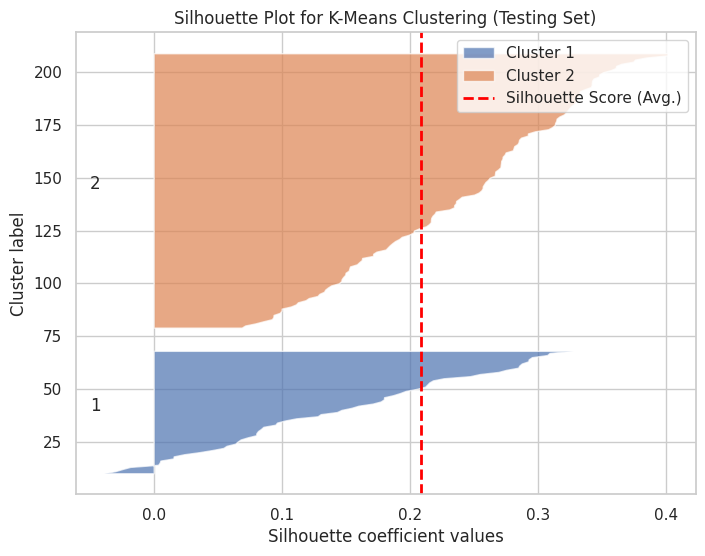

In [60]:
# Configurar el modelo de K-Means en el conjunto de entrenamiento
kmeans_model = KMeans(n_clusters=2, random_state=42)
labels_train = kmeans_model.fit_predict(X_test)

# Calcular los valores de Silueta en el conjunto de entrenamiento
silhouette_vals_train = silhouette_samples(X_test, labels_train)

# Calcular el valor promedio de Silueta para todos los puntos en el conjunto de entrenamiento
average_silhouette_train = silhouette_score(X_test, labels_train)

# Visualizar la Silueta en el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
y_lower_train = 10

for i in range(2):  # Cambia esto si tienes un número diferente de clusters
    cluster_silhouette_vals_train = silhouette_vals_train[labels_train == i]
    cluster_silhouette_vals_train.sort()

    y_upper_train = y_lower_train + len(cluster_silhouette_vals_train)

    plt.fill_betweenx(np.arange(y_lower_train, y_upper_train), 0, cluster_silhouette_vals_train, alpha=0.7, label=f'Cluster {i+1}')
    plt.text(-0.05, y_lower_train + 0.5 * len(cluster_silhouette_vals_train), str(i + 1))
    y_lower_train = y_upper_train + 10

plt.axvline(x=average_silhouette_train, color="red", linestyle="--", linewidth=2, label='Silhouette Score (Avg.)')
plt.title("Silhouette Plot for K-Means Clustering (Testing Set)")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.legend()
plt.show()


#Agrupamiento jerárquico por dendrogama

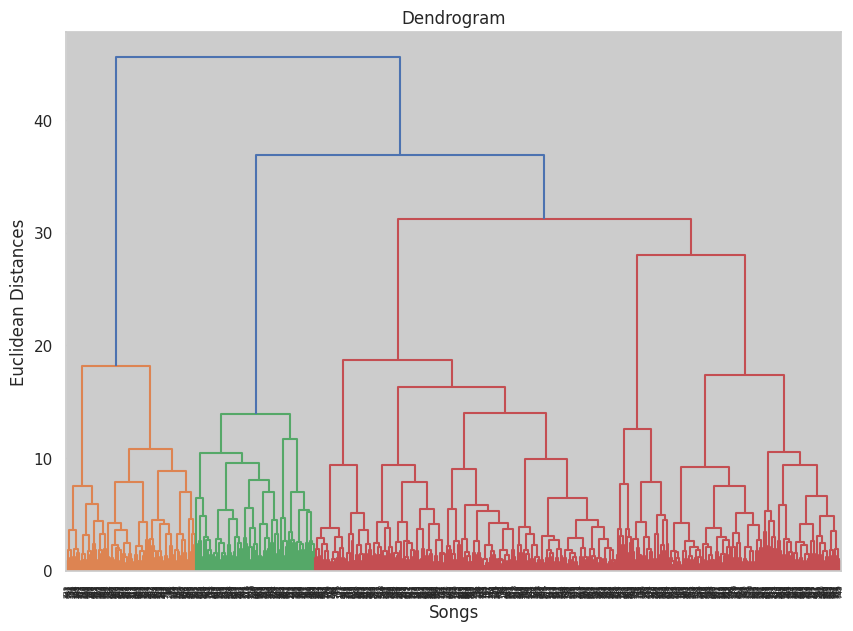

                      danceability_%   energy_%
hierarchical_cluster                           
0                          69.118388  68.625945
1                          56.238994  42.572327


In [95]:
# Creating a Dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Songs')
plt.ylabel('Euclidean Distances')
plt.show()

# Applying Hierarchical Clustering
# (Choose n_clusters based on the dendrogram)
agg_cluster= AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
spotify_data['hierarchical_cluster'] = agg_cluster.fit_predict(data_scaled)

# Analyzing the Clusters
cluster_summary = spotify_data.groupby('hierarchical_cluster')[featuresy].mean()
print(cluster_summary)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])

# Add the cluster label obtained from hierarchical clustering to this DataFrame
pc_df['Cluster'] = spotify_data['hierarchical_cluster']

Validación del modelo


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


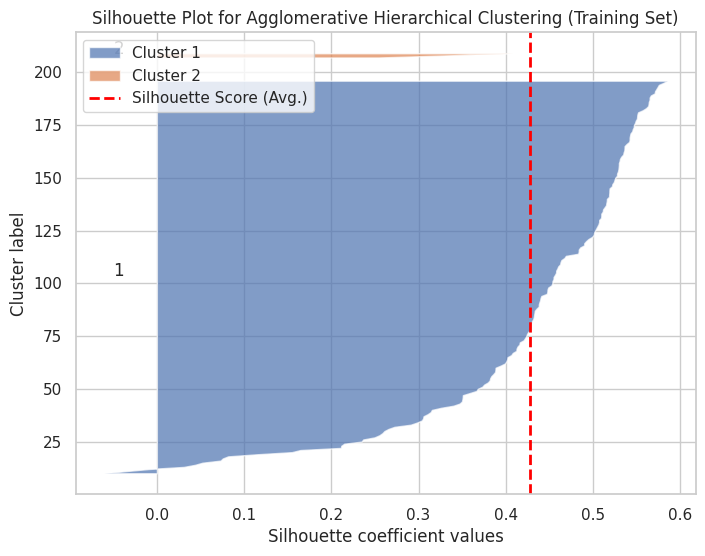

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import scale
import pandas as pd
import seaborn as sns

# Configurar el modelo de clustering jerárquico aglomerativo en el conjunto de entrenamiento
hclust_model = linkage(X_test, method='complete')  # Puedes ajustar el método de enlace según tus necesidades

# Realizar el corte del dendrograma para obtener 2 clusters (ajusta según tus necesidades)
cutree_clusters = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
cutree_clusters.fit(X_test)
labels_train = cutree_clusters.labels_

# Calcular los valores de Silueta en el conjunto de entrenamiento
silhouette_vals_train = silhouette_samples(X_test, labels_train)

# Calcular el valor promedio de Silueta para todos los puntos en el conjunto de entrenamiento
average_silhouette_train = silhouette_score(X_test, labels_train)

# Visualizar la Silueta en el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
y_lower_train = 10

for i in range(2):  # Cambia esto si tienes un número diferente de clusters
    cluster_silhouette_vals_train = silhouette_vals_train[labels_train == i]
    cluster_silhouette_vals_train.sort()

    y_upper_train = y_lower_train + len(cluster_silhouette_vals_train)

    plt.fill_betweenx(np.arange(y_lower_train, y_upper_train), 0, cluster_silhouette_vals_train, alpha=0.7, label=f'Cluster {i+1}')
    plt.text(-0.05, y_lower_train + 0.5 * len(cluster_silhouette_vals_train), str(i + 1))
    y_lower_train = y_upper_train + 10

# Analyzing the Clusters
cluster_summary = spotify_data.groupby('hierarchical_cluster')[featuresy].mean()
print(cluster_summary)

plt.axvline(x=average_silhouette_train, color="red", linestyle="--", linewidth=2, label='Silhouette Score (Avg.)')
plt.title("Silhouette Plot for Agglomerative Hierarchical Clustering (Training Set)")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.legend()
plt.show()


#Método clustering DBSCAN
Dado que deseas encontrar 2 clusters en tus datos de porcentajes de características y prefieres un método que sea fácil de entender y analizar, te recomendaría utilizar un enfoque de clustering basado en densidad como DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN se centra en identificar grupos de puntos de datos que están cerca unos de otros en función de la densidad de puntos vecinos. Son eficaces para encontrar clusters de diversas formas y tamaños, y son especialmente útiles cuando no estás seguro de cuántos clusters esperas encontrar. Además, DBSCAN puede identificar puntos de datos atípicos (ruido) en tus datos, lo que puede ser útil en el análisis.


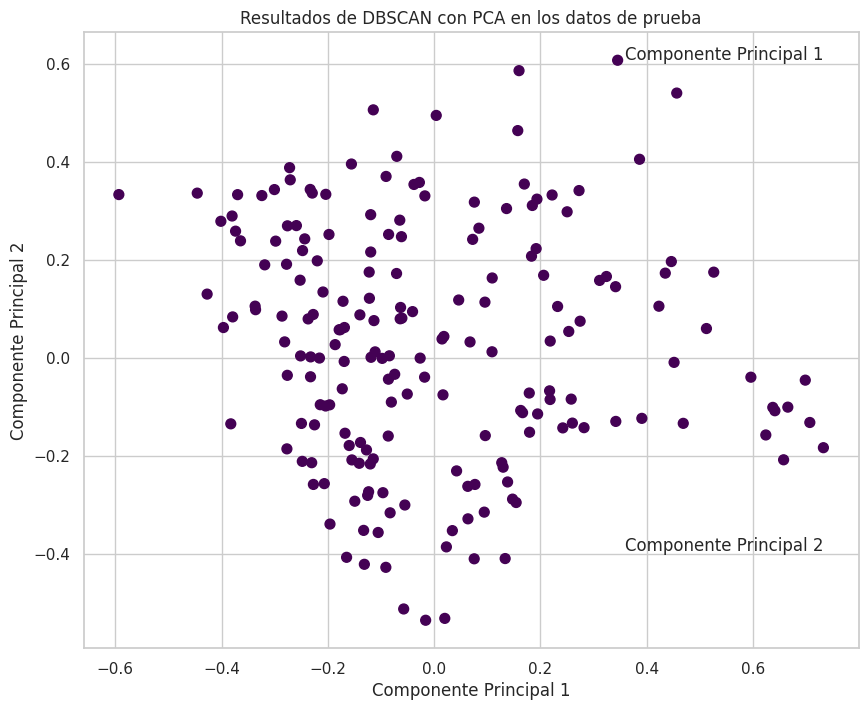

                                danceability_%   energy_%
DBSCAN_Cluster                                           
DBSCAN(eps=0.3, min_samples=4)        66.96957  64.279119


In [97]:
# Supongamos que tienes tus datos de entrenamiento en X_train
# Y tienes una lista con los nombres de tus características originales
features = ['acousticness_%', 'liveness_%', 'speechiness_%', 'danceability_%', 'valence_%', 'energy_%']

# n_components es el número de componentes principales que deseas
n_components = 2  # Puedes ajustarlo según tus necesidades

# Crear un objeto PCA con el número de componentes deseados
pca = PCA(n_components=n_components)

# Ajustar PCA a tus datos de entrenamiento
X_train_pca = pca.fit_transform(X_train)

# Generar nombres personalizados para los componentes principales basados en tus características originales
component_names = [f'PCA_{i+1} ({features[i]})' for i in range(n_components)]

# Crear un DataFrame con los componentes principales y sus nombres personalizados
pca_df = pd.DataFrame(data=X_train_pca, columns=component_names)

# Ahora tienes un DataFrame 'pca_df' que contiene los componentes principales con nombres personalizados.

# Reducción de dimensionalidad con PCA en los datos de entrenamiento
n_components = 2  # Número de componentes principales deseado
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)

# Obtener los nombres de los componentes principales
component_names = [f'Componente Principal {i+1}' for i in range(n_components)]

# Crear un modelo DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=4)  # Ajusta los parámetros según tus datos

# Ajustar el modelo DBSCAN a los datos de entrenamiento transformados por PCA
dbscan.fit(X_train_pca)
spotify_data['DBSCAN_Cluster'] = dbscan.fit(X_train_pca)

# Obtener etiquetas de cluster asignadas en los datos de prueba
X_test_pca = pca.transform(X_test)
labels = dbscan.fit_predict(X_test_pca)

# Visualizar los resultados en un gráfico de dispersión
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la gráfica
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=labels, cmap='viridis', s=50)  # Ajusta el tamaño de los puntos
plt.xlabel(component_names[0])
plt.ylabel(component_names[1])
plt.title('Resultados de DBSCAN con PCA en los datos de prueba')

# Mostrar los nombres de los componentes principales en la gráfica
for i, name in enumerate(component_names):
    plt.annotate(name, (X_test_pca[:, 0].max(), X_test_pca[:, 1].max() - i), fontsize=12, ha='right')

plt.show()

# Analyzing the Clusters
cluster_summary = spotify_data.groupby('DBSCAN_Cluster')[featuresy].mean()
print(cluster_summary)



DBSCAN agrupará los puntos de datos en dos clusters principales y asignará los puntos ruidosos a un cluster etiquetado como -1.El ruido en DBSCAN se refiere a los puntos que no se asignan a ningún cluster, y estos se etiquetarán como -1 . En el summary, los clusters se numerarán positivamente a partir de 0


Validación del modelo

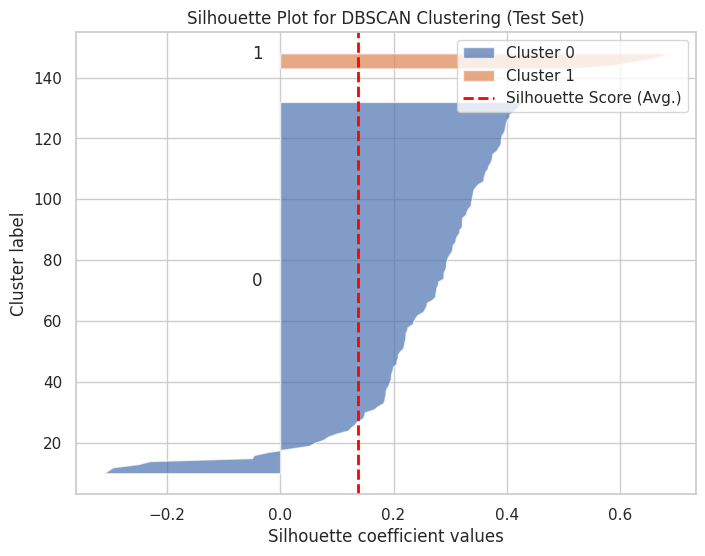

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Aplicar el modelo DBSCAN a X_test
dbscan_model = DBSCAN(eps=0.3, min_samples=4)
labels_test = dbscan_model.fit_predict(X_test)

# Calcular los valores de Silueta en el conjunto de prueba
silhouette_vals_test = silhouette_samples(X_test, labels_test)

# Calcular el valor promedio de Silueta para todos los puntos en el conjunto de prueba
average_silhouette_test = silhouette_score(X_test, labels_test)

# Visualizar la Silueta en el conjunto de prueba
plt.figure(figsize=(8, 6))
y_lower_test = 10

unique_labels = np.unique(labels_test)
for i in unique_labels:
    if i == -1:  # Puntos considerados como ruido
        continue

    cluster_silhouette_vals_test = silhouette_vals_test[labels_test == i]
    cluster_silhouette_vals_test.sort()

    y_upper_test = y_lower_test + len(cluster_silhouette_vals_test)

    plt.fill_betweenx(np.arange(y_lower_test, y_upper_test), 0, cluster_silhouette_vals_test, alpha=0.7, label=f'Cluster {i}')
    plt.text(-0.05, y_lower_test + 0.5 * len(cluster_silhouette_vals_test), str(i))
    y_lower_test = y_upper_test + 10

plt.axvline(x=average_silhouette_test, color="red", linestyle="--", linewidth=2, label='Silhouette Score (Avg.)')
plt.title("Silhouette Plot for DBSCAN Clustering (Test Set)")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.legend()
plt.show()
